<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/8_Trees_and_overfitting_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8. Trees and Overfitting**

### Objetivo
Que la o el estudiante aprenda a utilizar el algoritmo de Árboles de decisión para problemas de clasificación y de regresión y que vea un ejemplo de sobre ajuste.

### Descripción del procedimiento a seguir
- Se prueba un árbol de decisión para clasificación en el conjunto de datos Iris
  - Se carga el conjunto de datos Iris
  - Se seleccionan las caracteristicas y el target
  - Se separan los datos en entrenamiento y prueba
  - Se crea una Pipeline que incluye un método de escalamiento y un árbol de decisión para clasificación.
  - Se define la variable param_grid que incluye el espacio de búsqueda de hiperparámetros.
  - Se hace validación cruzada probando todos los hiperparámetros
  - Se evalúa en el conjunto de prueba
- Se prueba un árbol de decisión para clasificación en el conjunto de datos Titanic
  - Se realizan los pasos mostrados en la sección anterior.
  - Adicionalmente se incluye ColumnTransformer que permite incluir en el Pipeline transformaciones distintas para datos numéricos y datos categóricos.
- Se deja como ejercicio trabajar con un árbol de decisión para regresión con el conjunto de datos de Boston house.


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
2. https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Boston.csv


## **1. Importar bibliotecas**

In [48]:
#Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Datasets
from sklearn.datasets import load_iris

#Modelos
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

#Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

#Data split y seleccion de modelos
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Metricas
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


## **2. Clasificación sobre el conjunto de datos Iris**

### **2.1 Carga de datos y separación en matrix X y vector y**

En este aso, cargamos el conjunto de datos iris a través de datasets de Sklearn.

In [2]:
iris = load_iris()

# Create a Pandas DataFrame
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
y = pd.Series(iris.target)

In [3]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

### **2.2 Separación en conjunto de datos de entrenamiento y de prueba**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### **2.3 Creación del Pipeline**

En este caso, el Pipeline incluye a un escalador de tipo MinMax y a un árbol de decisión para clasificación.

In [6]:
# Define the scaler
scaler = MinMaxScaler()

# Define the KNN model
tree_model = DecisionTreeClassifier()

# Create a pipeline with scaler and KNN classifier
pipeline = Pipeline([
    ('scaler', scaler),
    ('tree', tree_model)
])

### **2.4 Definición del espacio de hiperparámetros sobre el que se hará la búsqueda**

In [7]:
# Define the hyperparameters to search
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    #'tree__splitter': ['best', 'random'],
    'tree__max_depth': np.arange(1,10),
    'tree__min_samples_split': np.arange(2,10),
    'tree__min_samples_leaf': np.arange(1,5),
}

### **2.5 Uso de GridSearch para buscar los mejores hiperparámetros**

Se usa *StratifiedKFold* para hacer los fold con una estrategia estratificada. <br>
Se realiza la búsqueda usando GridSearchCV.

In [9]:
# Define the cross-validation scheme

kf= StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Use GridSearchCV with the pipeline to find the best hyperparameter
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameter and its corresponding F1 score
print("Best hyperparameter max depth:", grid_search.best_params_['tree__max_depth'])
print("Best accuracy:", grid_search.best_score_)

Best hyperparameter max depth: 2
Best accuracy: 0.9523809523809524


Guardamos el mejor modelo en la variable *best_model*

In [10]:
# Extract the best model from the grid search
best_model = grid_search.best_estimator_

Imprimos los mejores hiperparámetros del modelo

In [11]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 2, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}


Imprimimos las clases que puede clasificar el modelo

In [12]:
classes = best_model.classes_

print("Classes:", classes)

Classes: [0 1 2]


### **2.6 Evaluamos en el conjunto de prueba**

In [13]:
# Make predictions on the scaled test data
best_model.fit(X_train,y_train)

y_test_pred = best_model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)
print(acc_test)

0.9555555555555556


### **2.7 Graficamos el árbol construido**

In [14]:
tree_classifier = best_model.named_steps['tree']

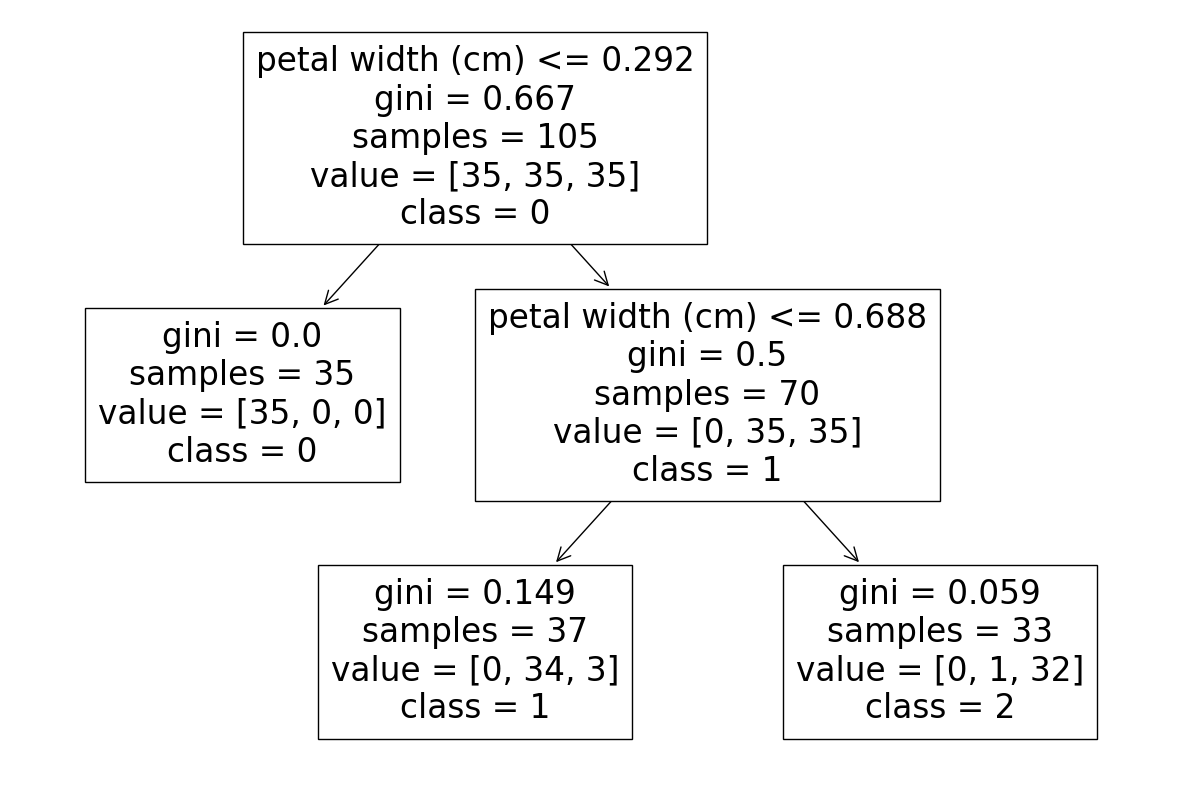

In [15]:
import matplotlib.pyplot as plt
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=['0','1','2'])
plt.show()

## **3. Clasificación del conjunto de datos Titanic con árbol de desición**

### **3.1 Carga de datos y separación**

Se cargan los datos <br>
Se separan en matriz de características y vector de targets <br>
Se separan en conjunto de datos de entrenamiento y de prueba

In [17]:
# Load the Titanic dataset (replace 'path_to_titanic.csv' with your actual file path)
titanic_data = pd.read_csv('/content/titanic (1).csv')

# Separate features and target variable
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'], axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### **3.2 Identificación de características numéricas y categóricas**

In [18]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

### **3.3 Se crean Pipelines que hacen el preprocesamiento sobre las columnas numéricas y categóricas**

A las columnas numéricas se les realiza de preprocesamiento: <br>
- Remplazar valores faltantes por el valor medio
- Escalamiento

A las columnas categóricas se les realiza de preprocesamiento: <br>
- Reemplezar valores faltantes por los valores más frecuentes
- One hot encoding

In [19]:
# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### **3.4 Se crea un *ColumnTransformer* que preprocesa de acuerdo a si es columna numérica o categórica**

In [20]:
# Create column transformer to apply transformations to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### **3.5 Se crea un Pipeline que incluye el preprocesamiento y el clasificador**

In [21]:
# Create the pipeline with preprocessing and the DecisionTreeClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier())])


### **3.6 Se ajusta el modelo con los datos de entrenamiento**

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

###**3.7 Comparación de exactitud sobre datos de entrenamiento y datos de prueba**

Esta es una demostración sencilla de como los datos se pueden sobre ajustar. Es decir, la métrica de desempeño resulta muy buena en los datos que se usaron para entrenarse, pero el modelo no es capaz de generalizar a datos no vistos y la métrica en el conjunto de prueba es mucho menor.

Se obtiene la exactitud sobre los mismos datos de entrenamiento. Para conocer si el modelo se ajustó correctamente a los datos de entrenamiento.

In [27]:
# Evaluate accuracy on the training set
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
print(f'Training Accuracy: {train_accuracy:.2f}')


Training Accuracy: 0.98


Se obtiene la exactitud sobre datos de prueba, que el modelo nunca vió cuando se ajustó.

In [28]:
# Evaluate accuracy on the testing set
test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
print(f'Testing Accuracy: {test_accuracy:.2f}')


Testing Accuracy: 0.80


Vemos que hay una diferencia de aproximadamente 0.20, lo que indica un sobreajuste

Imprimimos los hyperparámetros del modelo

In [29]:
# Get the parameters of the pipeline
pipeline_params = pipeline.get_params()

# Extract the parameters of the DecisionTreeClassifier
classifier_params = pipeline_params['classifier'].get_params()

# Display the parameters of the DecisionTreeClassifier
for param_name, param_value in classifier_params.items():
    print(f'{param_name}: {param_value}')

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best


### **3.8 Observamos como se transformaron los datos en la etapa de preprocesamiento**
Esto no es un paso para clasificar, es solo para que veamos como queda el vector de características después de aplicar el preprocesamiento indicado en el Pipeline.

In [30]:
# Fit the preprocessing pipeline on the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after one-hot encoding
feature_names_after_encoding = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Create a DataFrame to display the transformed data
transformed_df = pd.DataFrame(X_train_transformed, columns=list(numerical_features) + list(feature_names_after_encoding))

# Display the first few rows of the transformed data
print(transformed_df.head())


     Pclass           Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0  0.829568 -5.463229e-16 -0.465084 -0.466183  0.513812         0.0       1.0   
1 -0.370945 -5.463229e-16 -0.465084 -0.466183 -0.662563         0.0       1.0   
2 -1.571457 -5.463229e-16 -0.465084 -0.466183  3.955399         0.0       1.0   
3  0.829568 -9.078708e-01 -0.465084  0.727782 -0.467874         1.0       0.0   
4 -0.370945  9.167471e-02  0.478335  0.727782 -0.115977         1.0       0.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         0.0         0.0         1.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


## **4 Clasificación del conjunto de datos Titanic**

### **4.1 Carga y separación de conjunto de datos**

Leemos el conjunto de datos
Desechamos las columnas que no necesitamos
Creamos la matriz de características X y el vector de targets y
Separamos en conjunto de datos de entrenamiento y de prueba

In [31]:
# Load the Titanic dataset (replace 'path_to_titanic.csv' with your actual file path)
titanic_data = pd.read_csv('/content/titanic (1).csv')

# Separate features and target variable
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'], axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **4.2 Creación de Pipeline con etapa de preprocesamiento y clasificación**
- Identificamos las columnas numéricas y categóricas
- Definimos un procesamiento específico para numéricas y categóricas
- Definimos el Pipeline

In [32]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer to apply transformations to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with preprocessing and the DecisionTreeClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier())])


### **4.3 Se realiza la búsqueda de hiperparámetros**
- Definimos la malla de espacio de búsqueda de hiperparámetros
- Definimos un kfold estratificado
- Hacemos la búsqueda con validación cruzada

In [33]:
# Define the hyperparameters to search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [ 1, 2, 4,8]
}

# Define the cross-validation scheme (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation on the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy')

# Fit the data using GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='m...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Sex', 'Embarked'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 15, 20],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='accuracy')

### **4.4 Selección del mejor modelo e impresión de hiperparámetros**

In [34]:
#Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__splitter': 'random'}


### **4.5 Evaluación del modelo**

In [35]:
# Evalauamos en el train set solo para ver que no quedó sobreajustado
# Evaluate the model on the train set
train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8806179775280899
Test Accuracy: 0.7486033519553073


## **5. Ejercicio: Árboles de decisión para problema de regresión**

Utilizar árboles de decisión para predecir el valor incluido en 'MEDV' del conjunto de datos Boston house.
- Leer los datos y separarlos correctamente
- Definir un pipeline haciendo uso de ColumnTransformer. Identifica las columnas numéricas y define un imputador con estrategia de media y un escalador Standard.
- Importar la clase correspondiente a árboles de decisión para regresión
- Hacer los cambios necesarios para trabajar con problemas de regresión, incluyendo no usar estratificación en la separación de datos y revisar las métricas.
- Define un espacio de búsqueda de hiperparámetros del árbol. También considera que quizás debas cambiar los criterios del árbol para trabajar con problemas de regresión. Revisa la documentación de la clase.
- Haz la búsqueda de hiperparámetros con GridSearchCV. Usa la métrica MSE.
- Evalúa en el conjunto de prueba.


- http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
- https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Boston.csv

In [36]:
url = "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Boston.csv"
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'RAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#boston_data = pd.read_csv(url, names=column_names)

boston_data = pd.read_csv(url)

boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [37]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [39]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [42]:
# Select features and target variable
X = boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = boston_data['MEDV']
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [43]:
rows_with_nan = X[X.isna().any(axis=1)]
print("Rows with NaN values:\n", rows_with_nan)

Rows with NaN values:
 Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT]
Index: []


In [72]:
# Split the data into training and testing sets using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['int64']).columns

# Create preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer to apply transformations to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with preprocessing and the DecisionTreeClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeRegressor())])

In [75]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CHAS', 'RAD', 'TAX'], dtype='object'))])),
                ('classifier', DecisionTreeRegressor())])

In [76]:
# Define the hyperparameters to search
param_grid = {
    'classifier__criterion': ['squared_error', 'friedman_mse'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [ 1, 2, 4,8]
}

# Define the cross-validation scheme (StratifiedKFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation on the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')

# Fit the data using GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImpute...
                                                                         Index(['CHAS', 'RAD', 'TAX'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeRegressor())]),
             param_grid={'classifier__criterion': ['squared_error',
                                                   'friedman_mse'],
                         'classifier__max_depth': [None, 5, 10, 15, 20],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [77]:
#Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'classifier__criterion': 'squared_error', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__splitter': 'random'}


In [81]:
# Evalauamos en el train set solo para ver que no quedó sobreajustado
# Evaluate the model on the train set
train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9364057349768943
Test Accuracy: 0.8966804799809934
